In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import src.Teleconnection.season_eof as season_eof
import src.Teleconnection.tools as tools

import numpy as np

In [6]:
zg = xr.open_mfdataset("/work/mh0033/m300883/Tel_MMLE/data/MPI_GE/zg_Jun/*.nc", combine='nested', concat_dim='ens')

In [7]:
zg

<xarray.Dataset>
Dimensions:  (time: 250, lon: 70, lat: 32, plev: 26, ens: 100)
Coordinates:
  * time     (time) datetime64[ns] 1850-06-30T23:52:00 ... 2099-06-30T23:52:00
  * lon      (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 33.75 35.62 37.5 39.38
  * lat      (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7.75e+04 ... 50.0 20.0 10.0
Dimensions without coordinates: ens
Data variables:
    var156   (ens, time, plev, lat, lon) float32 dask.array<chunksize=(1, 250, 26, 32, 70), meta=np.ndarray>
Attributes:
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    Conventions:               CF-1.6
    institution:               Max Planck Institute for Meteorology
    history:                   Tue Jul 25 10:26:19 2023: cdo -O -P 32 -splitm...
    cdo_openmp_thread_number:  32
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [8]:
# split the ens 
zg_data = zg.var156

In [9]:
spm = zg_data.sel(plev = 50000).mean(dim = ('lon','lat'))

In [10]:
spm = spm/1000

In [11]:
spm_ensmean = spm.mean(dim = 'ens')

In [12]:
spm_max = spm.max(dim = 'ens')
spm_min = spm.min(dim = 'ens')

In [13]:
spm_min

<xarray.DataArray 'var156' (time: 250)>
dask.array<_nanmin_skip-aggregate, shape=(250,), dtype=float32, chunksize=(250,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-06-30T23:52:00 ... 2099-06-30T23:52:00
    plev     float64 5e+04

In [23]:
spm.load()

<xarray.DataArray 'var156' (ens: 100, time: 250)>
array([[5.6474404, 5.6546836, 5.6568804, ..., 5.761514 , 5.7655168,
        5.7515993],
       [5.661758 , 5.6659064, 5.6610193, ..., 5.7744927, 5.766157 ,
        5.7825723],
       [5.644202 , 5.648429 , 5.671311 , ..., 5.7674975, 5.75713  ,
        5.7497473],
       ...,
       [5.6612616, 5.667024 , 5.667711 , ..., 5.782256 , 5.762232 ,
        5.7537255],
       [5.6645727, 5.659145 , 5.63575  , ..., 5.755565 , 5.7666607,
        5.7720375],
       [5.668571 , 5.6566296, 5.657906 , ..., 5.764279 , 5.773355 ,
        5.7666774]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-06-30T23:52:00 ... 2099-06-30T23:52:00
    plev     float64 5e+04
Dimensions without coordinates: ens

([<matplotlib.axis.YTick at 0x7fffa715a2f0>,
 [Text(0, 5.4, '5.4'), Text(0, 5.5, '5.5')])

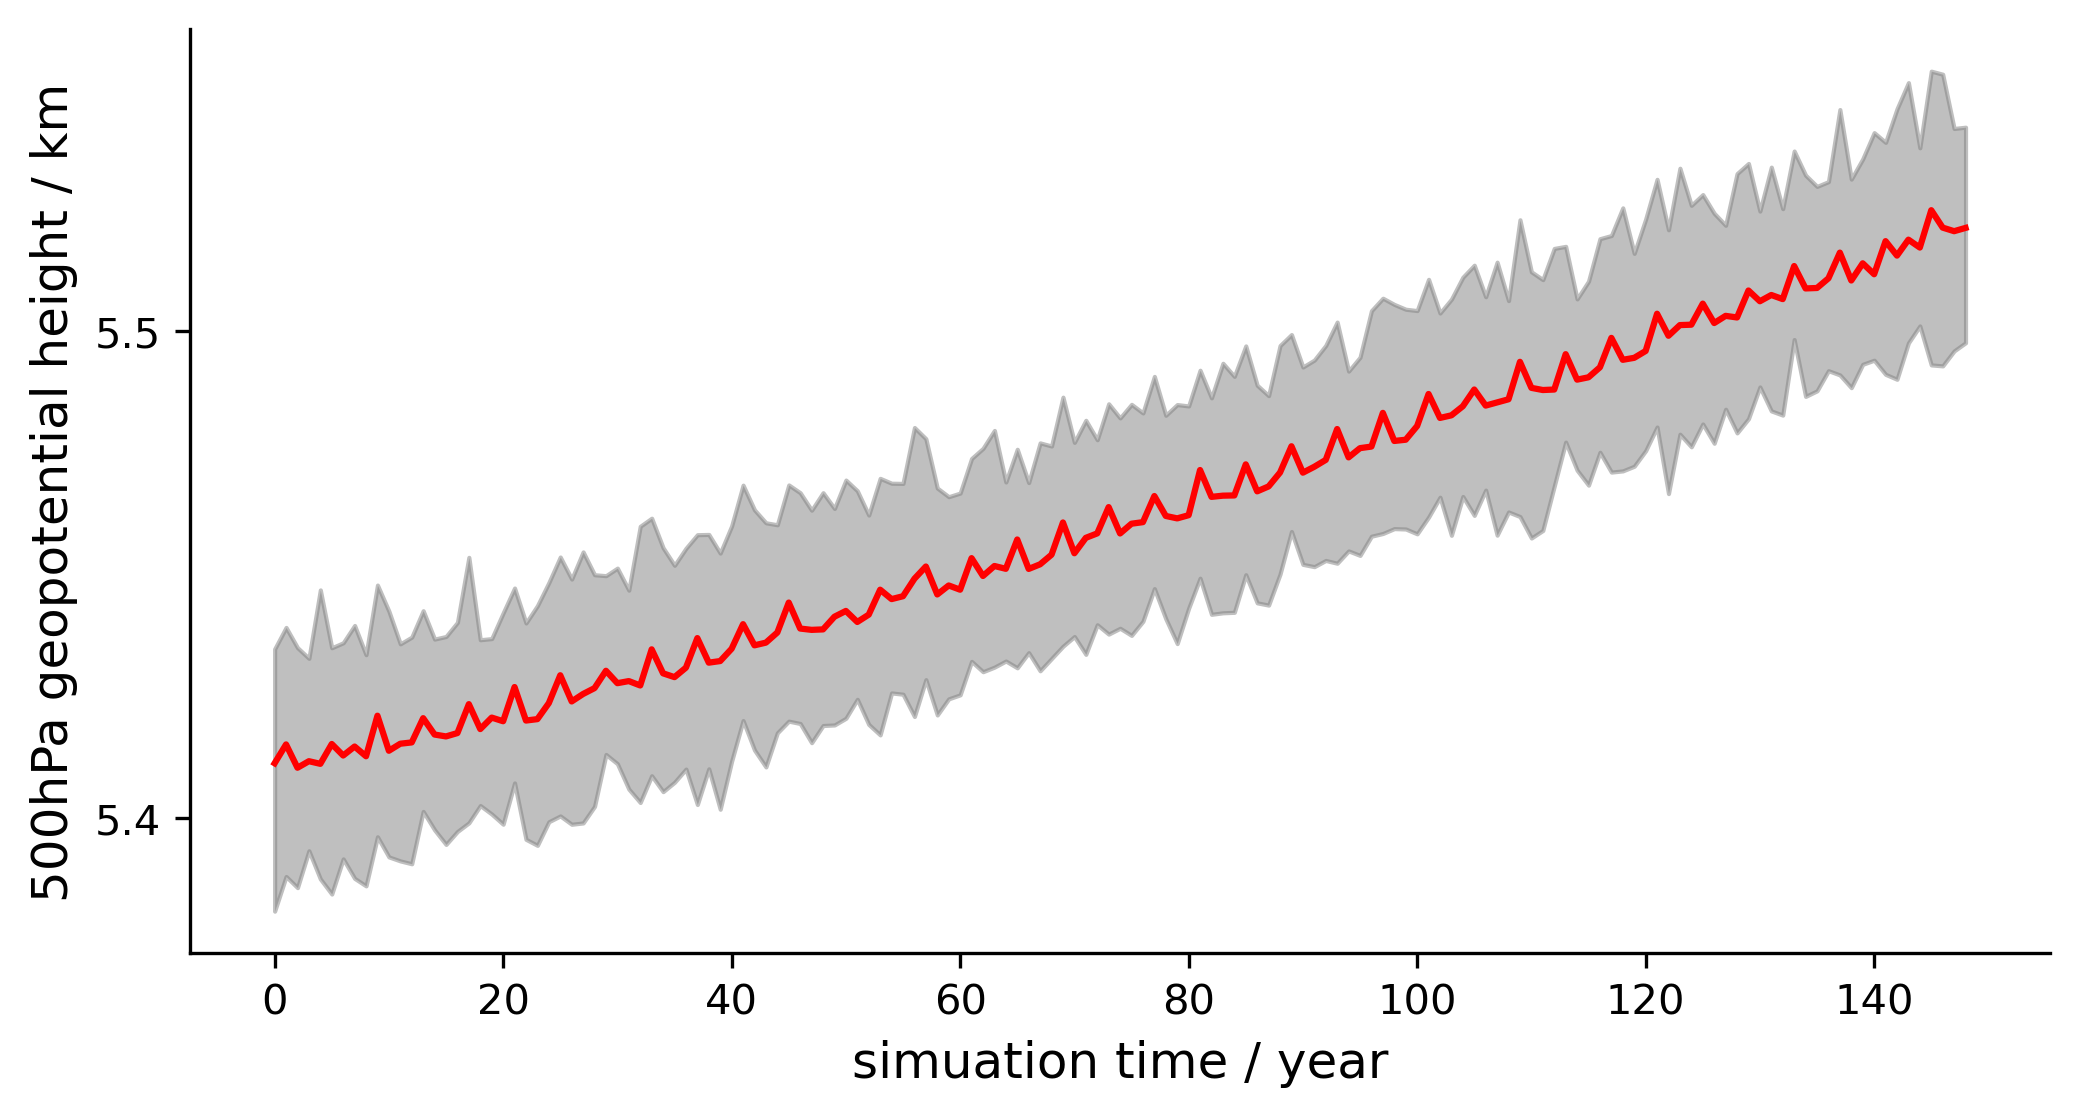

In [11]:
# fig with 300 dpi
plt.figure(figsize = (8,4),dpi = 300)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.plot(np.arange(0,149),spm_ensmean,color = 'red')
plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0.5)

# no boundary line in upper and right
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ylalbel as "500hPa geopotential height (km)"
plt.ylabel("500hPa geopotential height / km", fontsize = 12)
# x label as "simuation time (year)"
plt.xlabel("simuation time / year", fontsize = 12)

# only show the yticks and labels on [5.4,5.5]
plt.yticks(np.arange(5.4,5.6,0.1),np.arange(5.4,5.6,0.1))




In [30]:
spm

<xarray.DataArray 'var156' (ens: 100, time: 250)>
array([[5.6474404, 5.6546836, 5.6568804, ..., 5.761514 , 5.7655168,
        5.7515993],
       [5.661758 , 5.6659064, 5.6610193, ..., 5.7744927, 5.766157 ,
        5.7825723],
       [5.644202 , 5.648429 , 5.671311 , ..., 5.7674975, 5.75713  ,
        5.7497473],
       ...,
       [5.6612616, 5.667024 , 5.667711 , ..., 5.782256 , 5.762232 ,
        5.7537255],
       [5.6645727, 5.659145 , 5.63575  , ..., 5.755565 , 5.7666607,
        5.7720375],
       [5.668571 , 5.6566296, 5.657906 , ..., 5.764279 , 5.773355 ,
        5.7666774]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-06-30T23:52:00 ... 2099-06-30T23:52:00
    plev     float64 5e+04
Dimensions without coordinates: ens

In [31]:
spm.max()

<xarray.DataArray 'var156' ()>
array(5.79173756)
Coordinates:
    plev     float64 5e+04

In [32]:
spm.min()

<xarray.DataArray 'var156' ()>
array(5.62730503)
Coordinates:
    plev     float64 5e+04

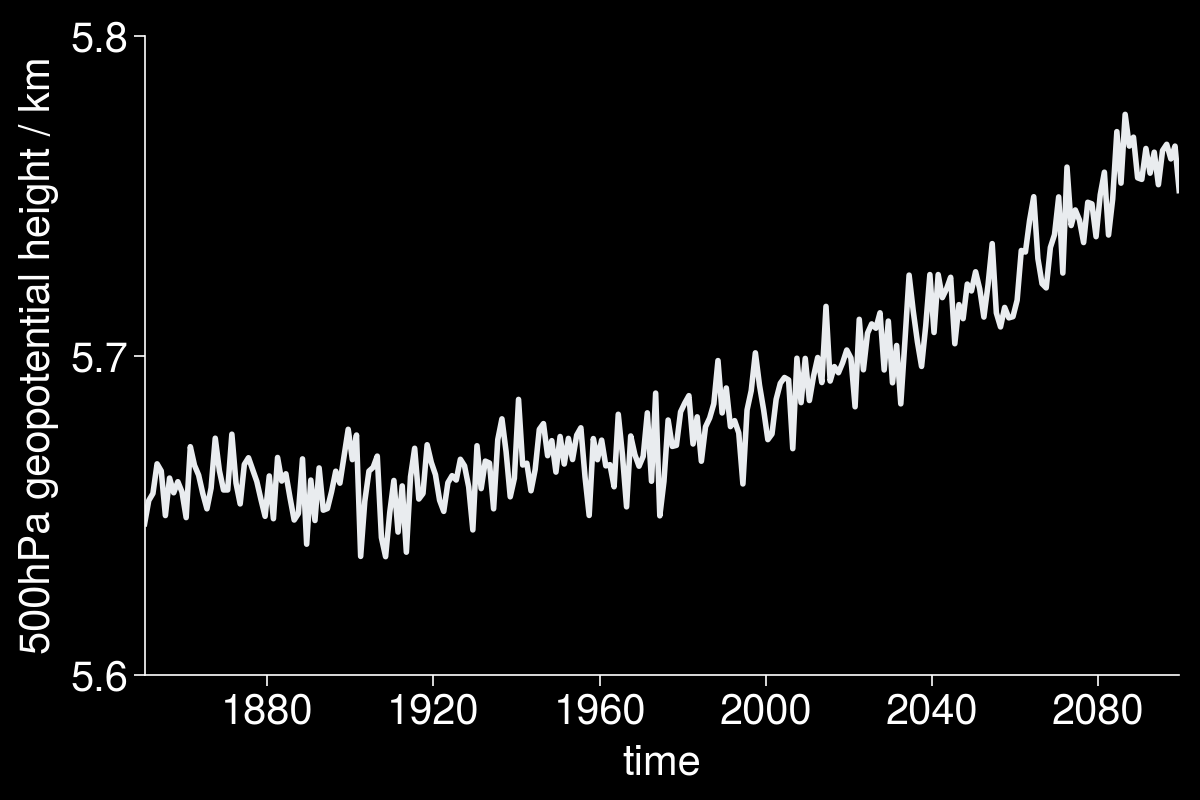

In [49]:
# fig with 300 dpi
import proplot as pplt
params = {
    "ytick.color": "w",
    "xtick.color": "w",
    "axes.labelcolor": "w",
    "axes.edgecolor": "w",
    "tick.labelcolor": "w",
    "text.color": "w",
    "font.size": 15,
}
pplt.rc.update(params)
fig, ax = pplt.subplots(nrows = 1, ncols = 1,figsize = (6,4),facecolor="k",)

ax.format(
    xminorticks="null",
    yminorticks="null",
    grid = False,
    ylocator = np.arange(5.6,5.8,0.1),
    ylabel = "500hPa geopotential height / km",
    facecolor = "k",
    ylim = (5.6,5.8),
    xrotation = 0,
    )

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
# plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0.5)
ax.plot(x = spm.time, y = spm.isel(ens = 0).values, color = 'grey2',linewidth = 2)


# no boundary line in upper and right
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




ValueError: Array has 1 columns but got 250 labels.

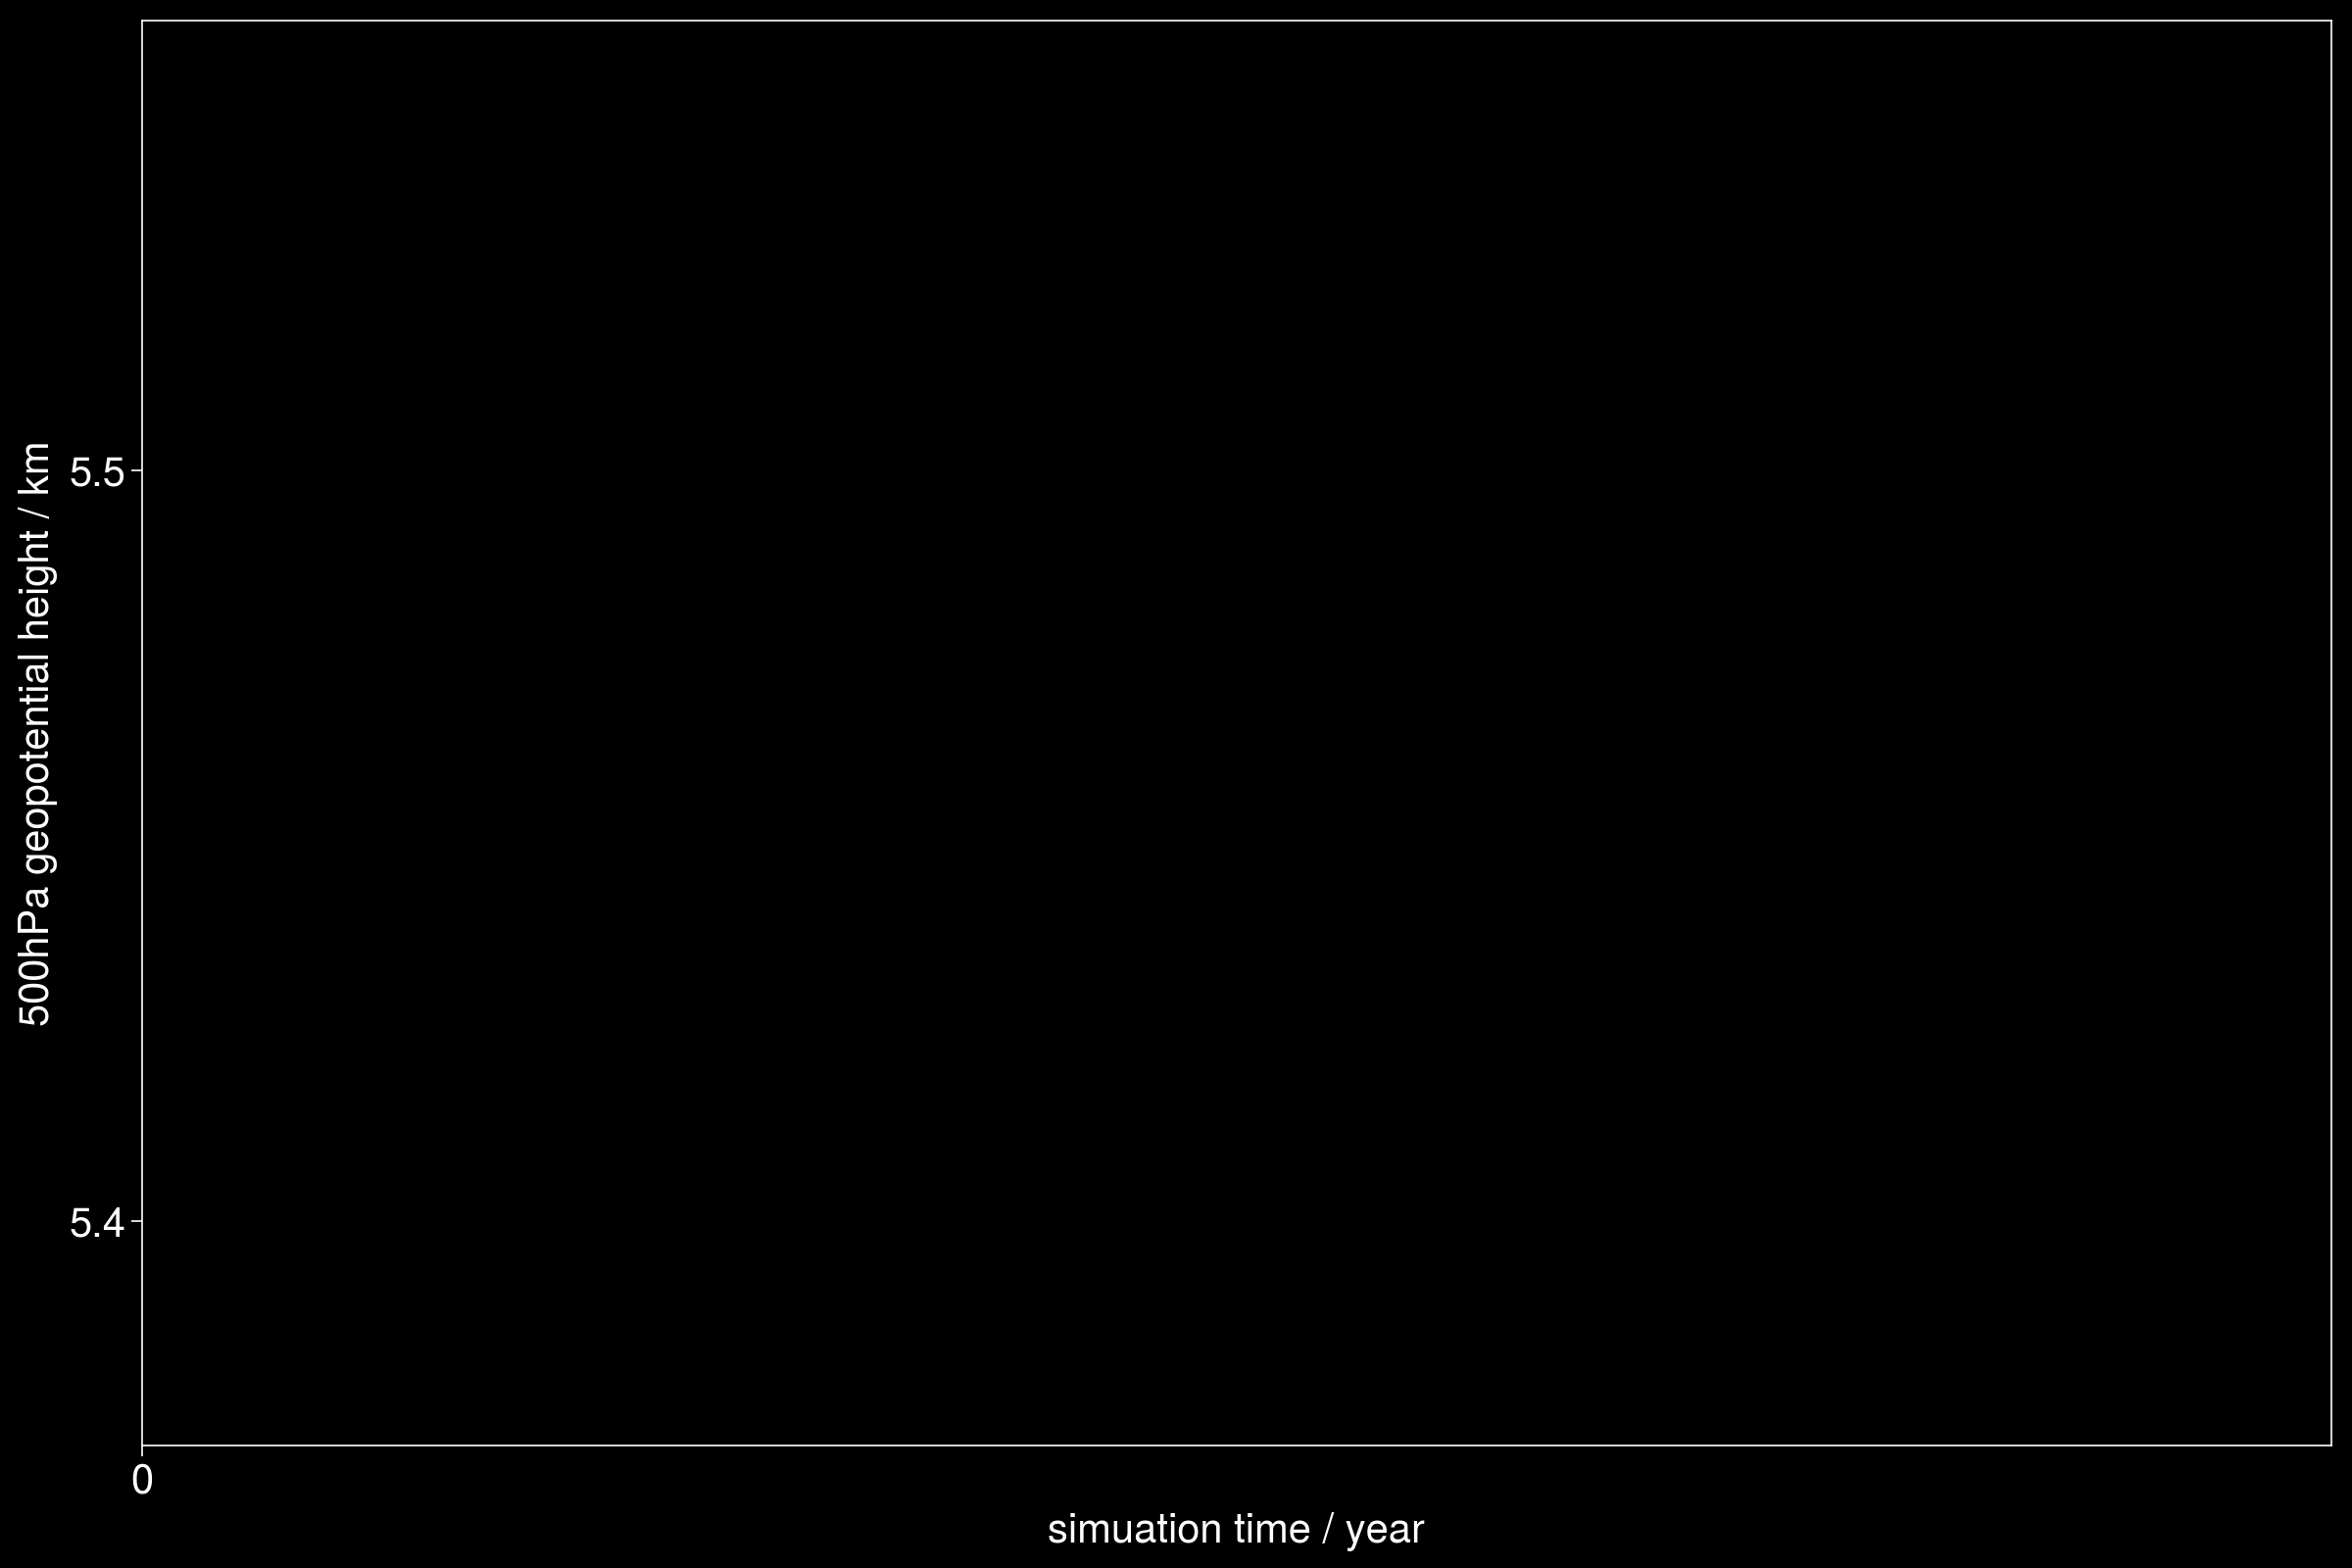

In [16]:
# fig with 300 dpi
import proplot as pplt
params = {
    "ytick.color": "w",
    "xtick.color": "w",
    "axes.labelcolor": "w",
    "axes.edgecolor": "w",
    "tick.labelcolor": "w",
    "text.color": "w",
    "font.size": 15,
}
pplt.rc.update(params)
fig, ax = pplt.subplots(nrows = 1, ncols = 1,figsize = (12,8),facecolor="k",)

ax.format(
    xminorticks="null",
    yminorticks="null",
    grid = False,
    xlocator = np.arange(0,149,20),
    ylocator = np.arange(5.4,5.6,0.1),
    xlabel = "simuation time / year",
    ylabel = "500hPa geopotential height / km",
    facecolor = "k",
    ylim = (5.37,5.56)

)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
# plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0.5)



# no boundary line in upper and right
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)






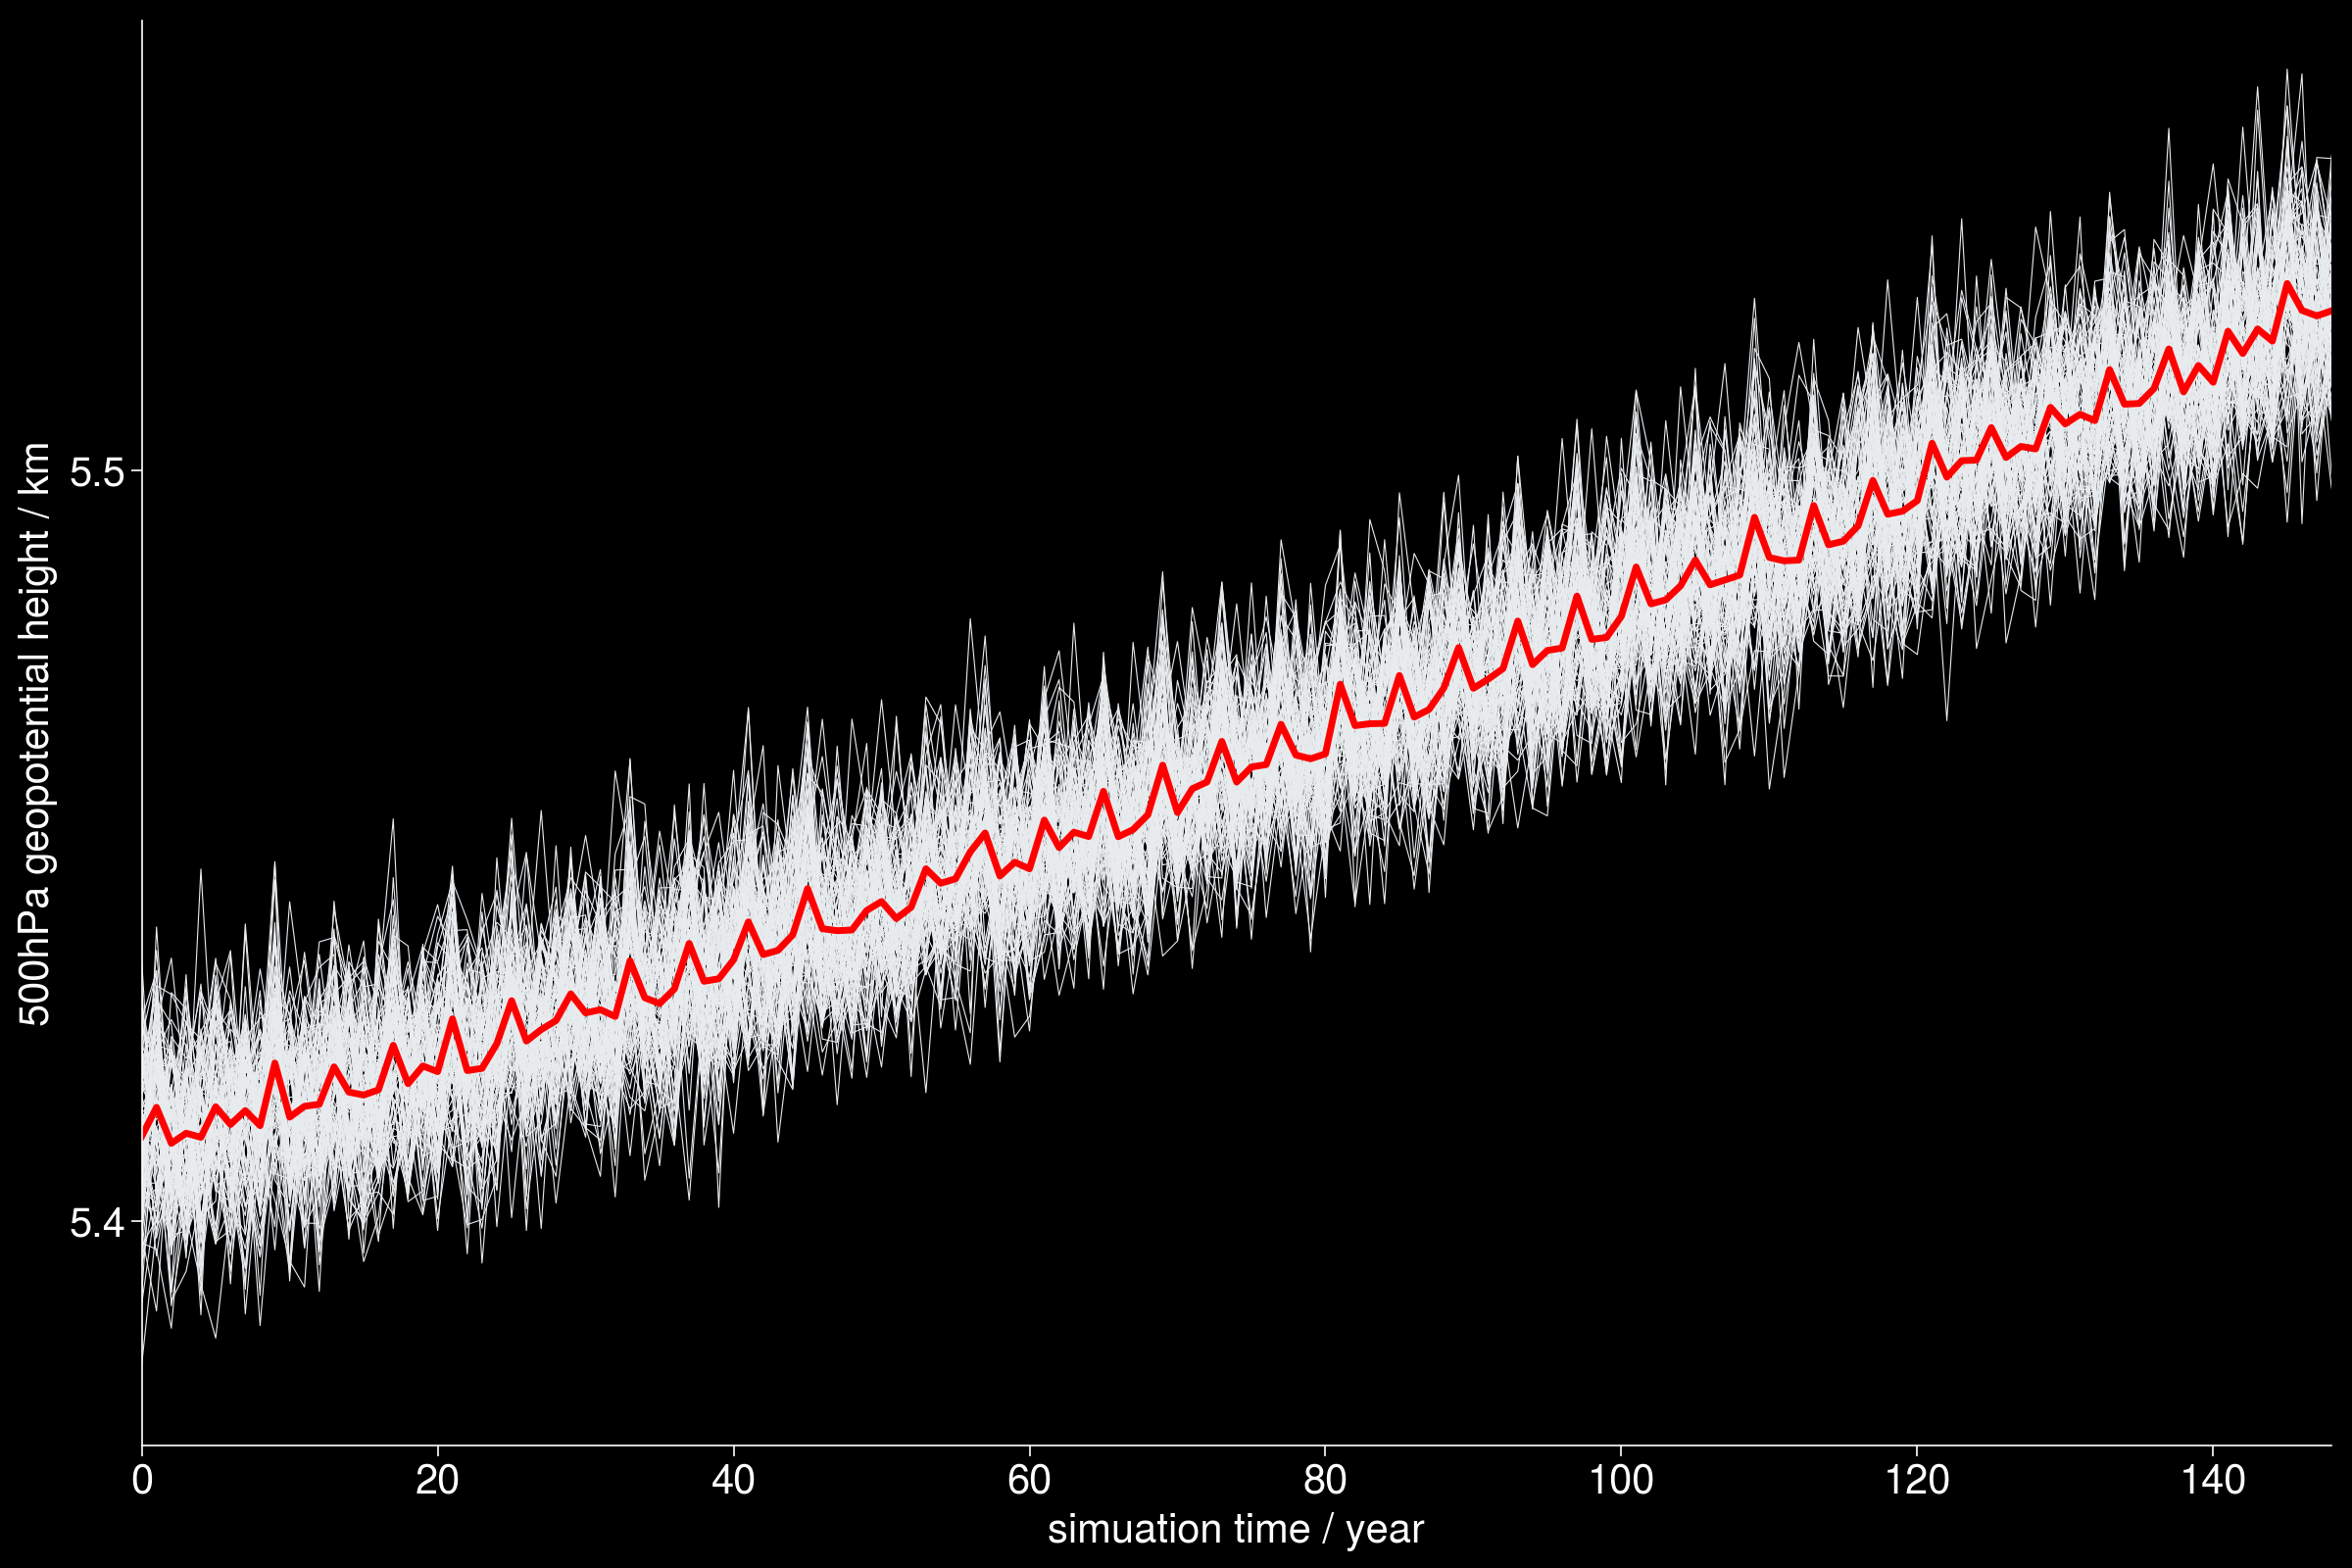

In [69]:
# fig with 300 dpi
import proplot as pplt
params = {
    "ytick.color": "w",
    "xtick.color": "w",
    "axes.labelcolor": "w",
    "axes.edgecolor": "w",
    "tick.labelcolor": "w",
    "text.color": "w",
    "font.size": 15,
}
pplt.rc.update(params)
fig, ax = pplt.subplots(nrows = 1, ncols = 1,figsize = (12,8),facecolor="k",)

ax.format(
    xminorticks="null",
    yminorticks="null",
    grid = False,
    xlocator = np.arange(0,149,20),
    ylocator = np.arange(5.4,5.6,0.1),
    xlabel = "simuation time / year",
    ylabel = "500hPa geopotential height / km",
    facecolor = "k",
    ylim = (5.37,5.56)
)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
# plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0.5)
ax.plot(np.arange(0,149),spm,color = 'gray2', linewidth = 0.4)
ax.plot(np.arange(0,149),spm_ensmean,color = 'red',linewidth = 2.5)


# no boundary line in upper and right
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)






In [59]:
spm_demean = spm - spm_ensmean
spm_demean = spm_demean + spm_ensmean[0]

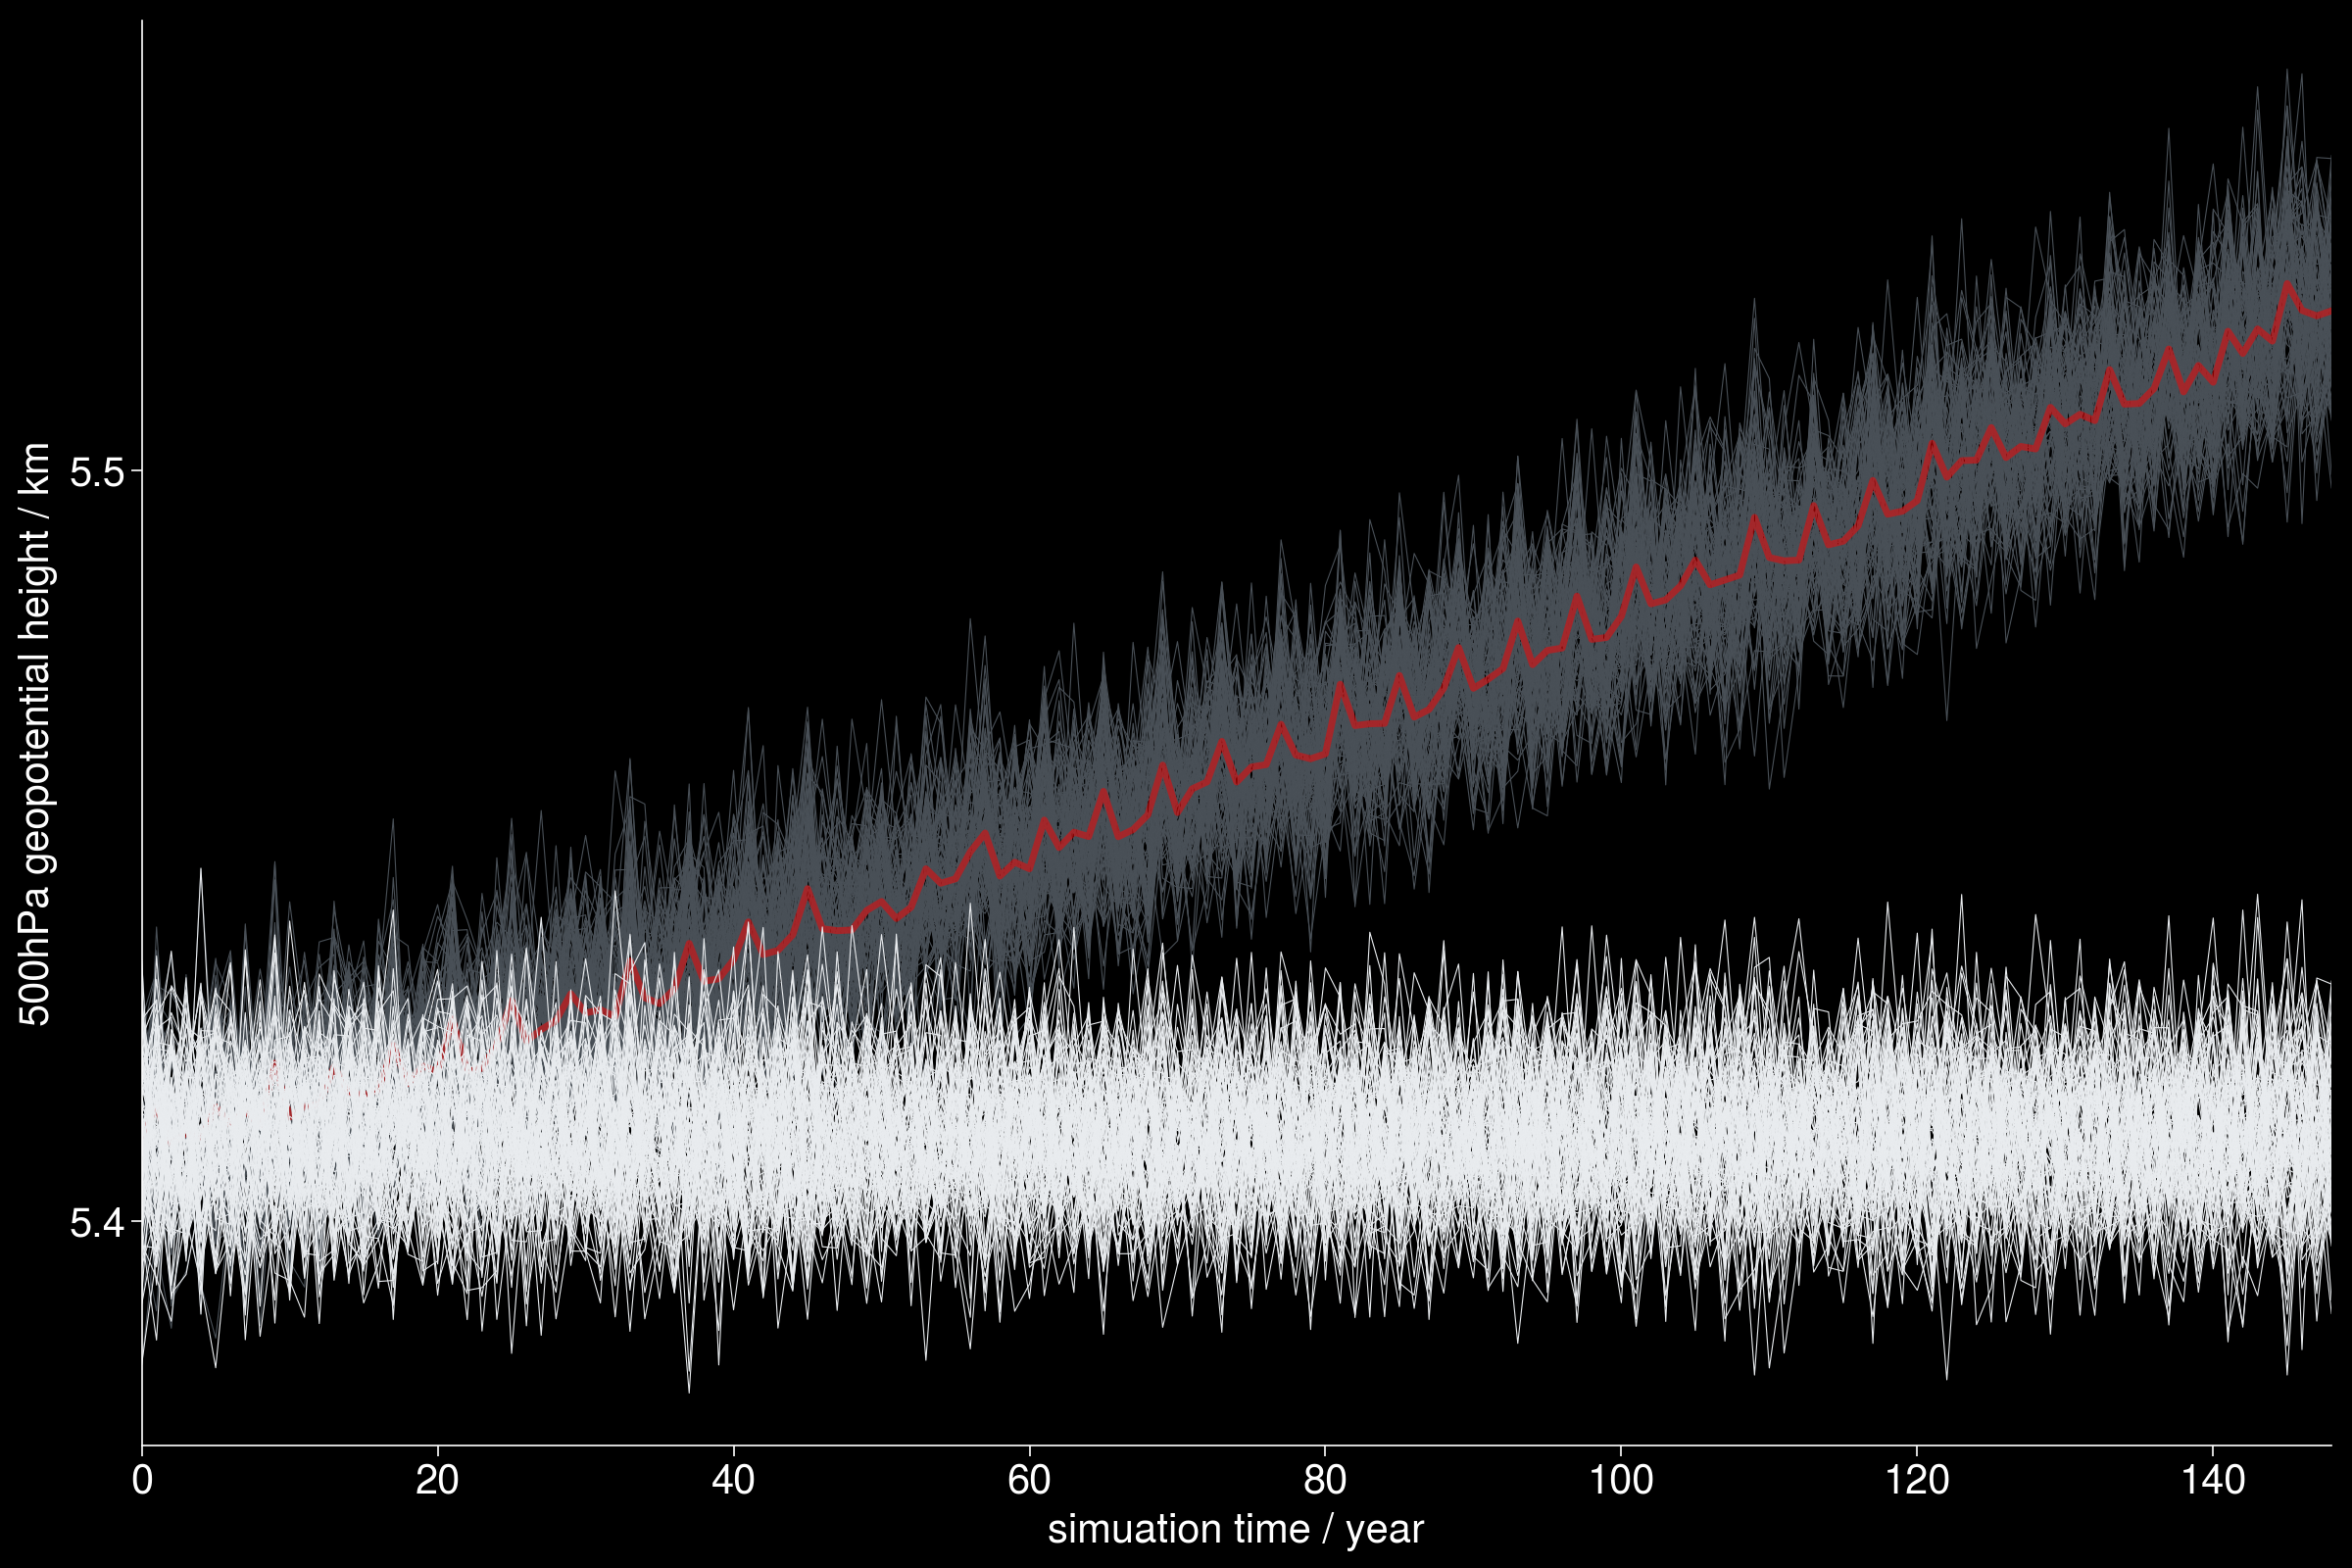

In [70]:
# fig with 300 dpi
import proplot as pplt
params = {
    "ytick.color": "w",
    "xtick.color": "w",
    "axes.labelcolor": "w",
    "axes.edgecolor": "w",
    "tick.labelcolor": "w",
    "text.color": "w",
    "font.size": 15,
}
pplt.rc.update(params)
fig, ax = pplt.subplots(nrows = 1, ncols = 1,figsize = (12,8),facecolor="k",)

ax.format(
    xminorticks="null",
    yminorticks="null",
    grid = False,
    xlocator = np.arange(0,149,20),
    ylocator = np.arange(5.4,5.6,0.1),
    xlabel = "simuation time / year",
    ylabel = "500hPa geopotential height / km",
    facecolor = "k",
    ylim = (5.37,5.56)
)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
# plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0.5)
ax.plot(np.arange(0,149),spm,color = 'gray7', linewidth = 0.4)
ax.plot(np.arange(0,149),spm_ensmean,color = 'red',alpha = 0.5,linewidth = 2.5)

ax.plot(np.arange(0,149),spm_demean,color = "grey2",linewidth = 0.4)


# no boundary line in upper and right
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)






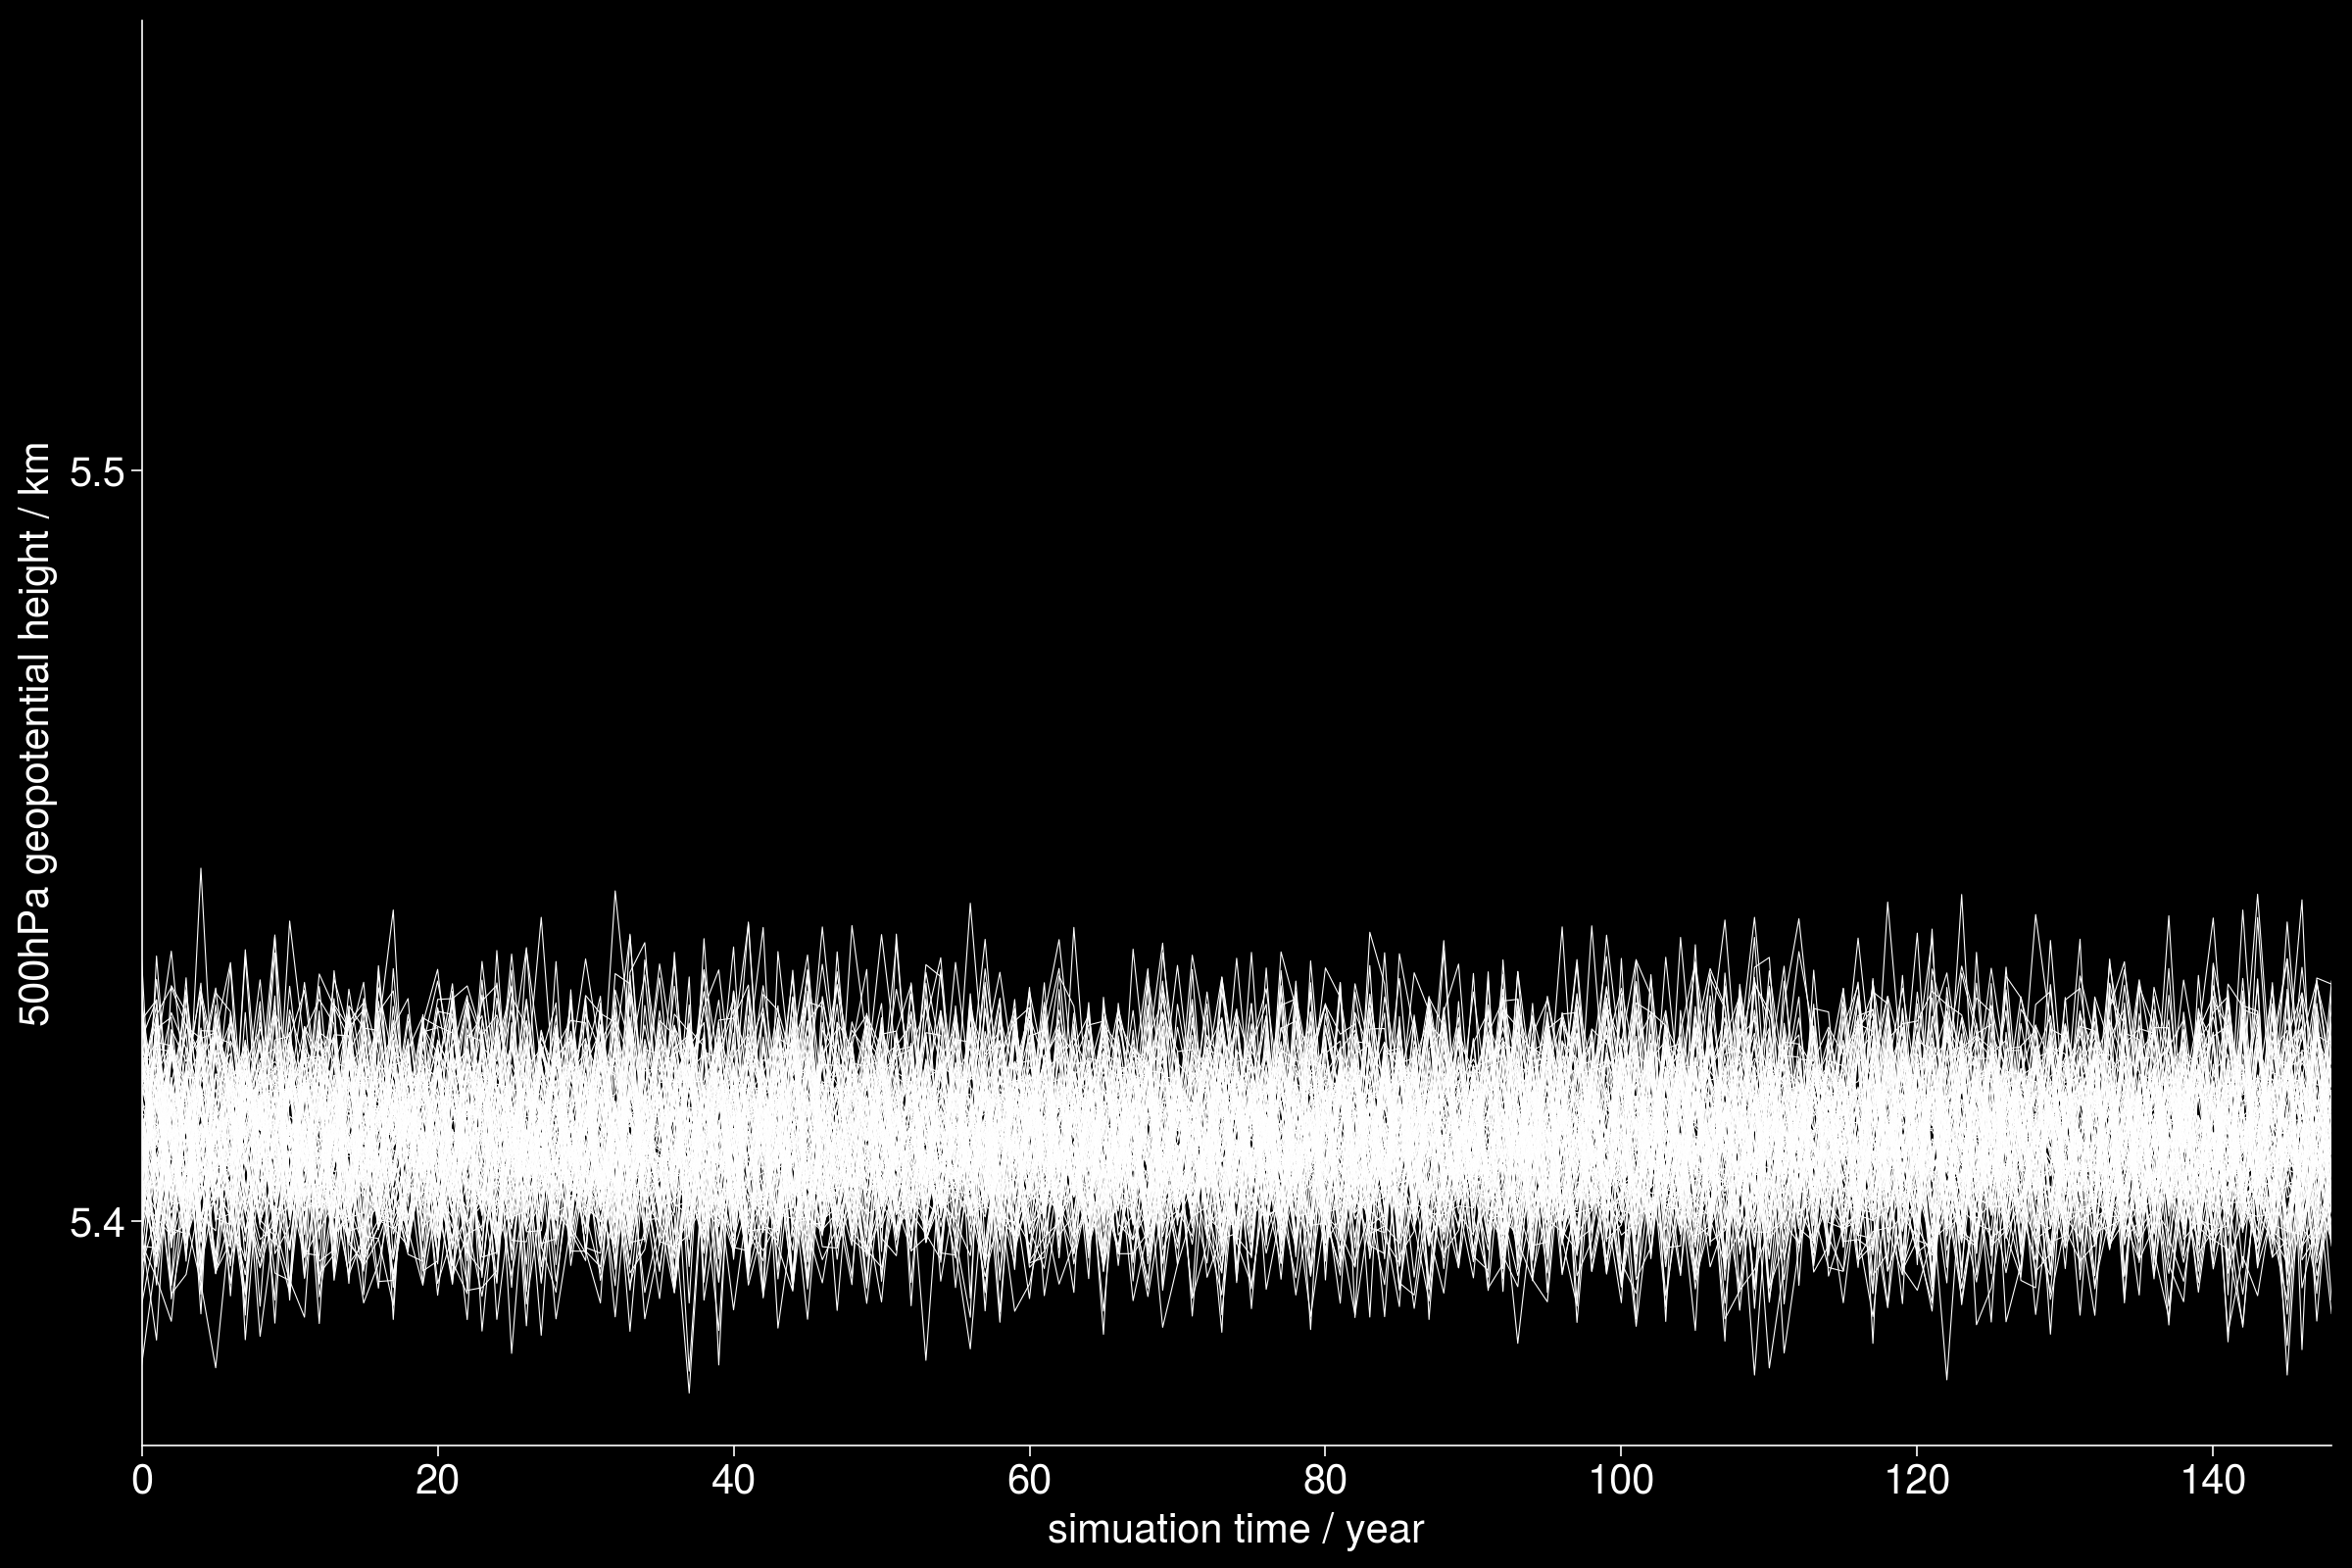

In [72]:
# fig with 300 dpi
import proplot as pplt
params = {
    "ytick.color": "w",
    "xtick.color": "w",
    "axes.labelcolor": "w",
    "axes.edgecolor": "w",
    "tick.labelcolor": "w",
    "text.color": "w",
    "font.size": 15,
}
pplt.rc.update(params)
fig, ax = pplt.subplots(nrows = 1, ncols = 1,figsize = (12,8),facecolor="k",)

ax.format(
    xminorticks="null",
    yminorticks="null",
    grid = False,
    xlocator = np.arange(0,149,20),
    ylocator = np.arange(5.4,5.6,0.1),
    xlabel = "simuation time / year",
    ylabel = "500hPa geopotential height / km",
    facecolor = "k",
    ylim = (5.37,5.56)
)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
# plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0.5)
ax.plot(np.arange(0,149),spm_demean,color = "white",linewidth = 0.4)


# no boundary line in upper and right
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)






In [17]:
spm_demean = spm - spm_ensmean
spm_demean = spm_demean + spm_ensmean[0]

In [18]:
spm_demeanmax = spm_demean.max(dim = 'ens')
spm_demeanmin = spm_demean.min(dim = 'ens')

([<matplotlib.axis.YTick at 0x7f28ae294ca0>,
 [Text(0, 5.4, '5.4'), Text(0, 5.5, '5.5')])

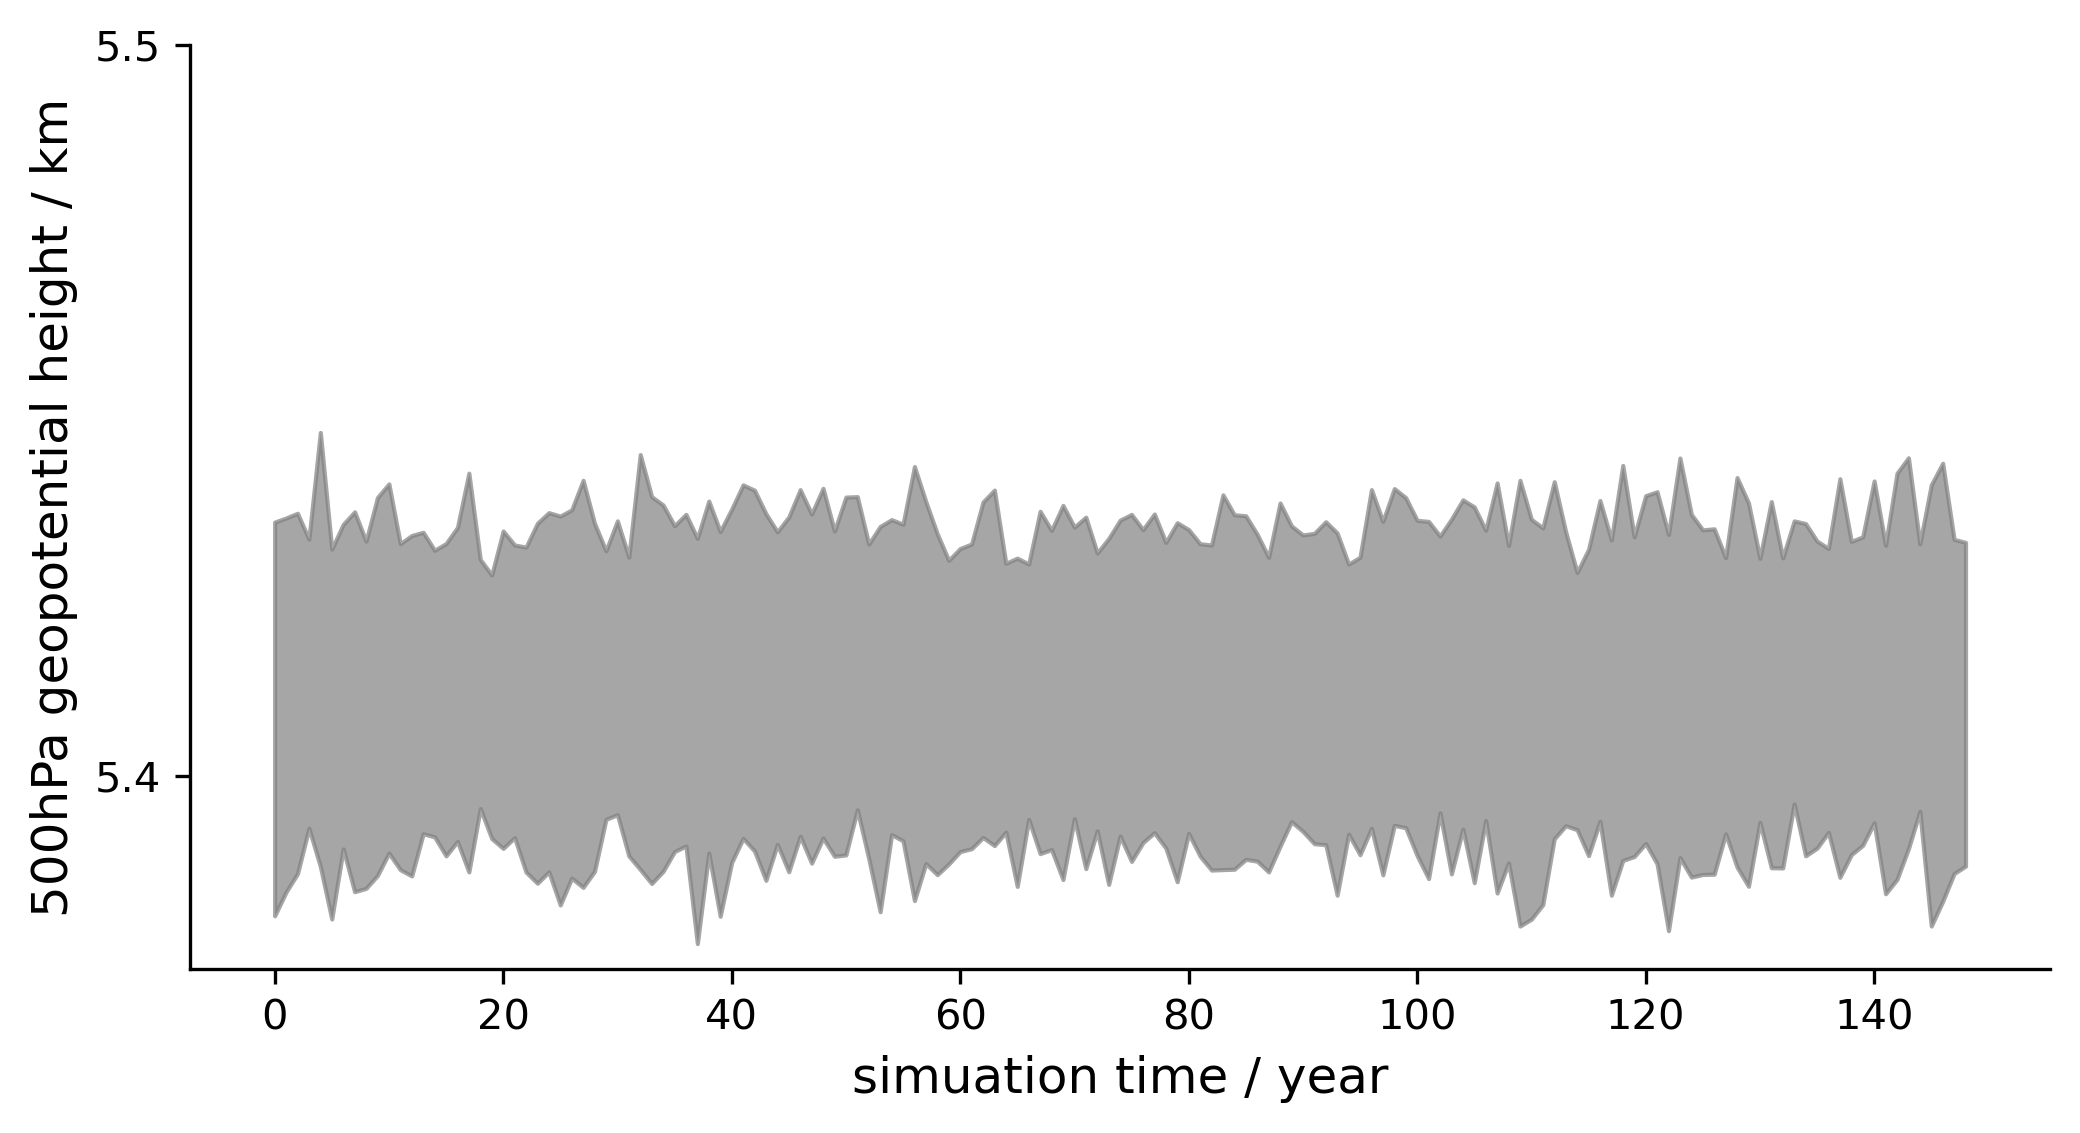

In [24]:
# fig with 300 dpi
plt.figure(figsize = (8,4),dpi = 300)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.fill_between(np.arange(0,149),spm_demeanmax.values,spm_demeanmin.values, color = 'gray', alpha = 0.7)

# no boundary line in upper and right
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ylalbel as "500hPa geopotential height (km)"
plt.ylabel("500hPa geopotential height / km", fontsize = 12)
# x label as "simuation time (year)"
plt.xlabel("simuation time / year", fontsize = 12)

# only show the yticks and labels on [5.4,5.5]
plt.yticks(np.arange(5.4,5.6,0.1),np.arange(5.4,5.6,0.1))



([<matplotlib.axis.YTick at 0x7f28ae1e46d0>,
 [Text(0, 5.4, '5.4'), Text(0, 5.5, '5.5')])

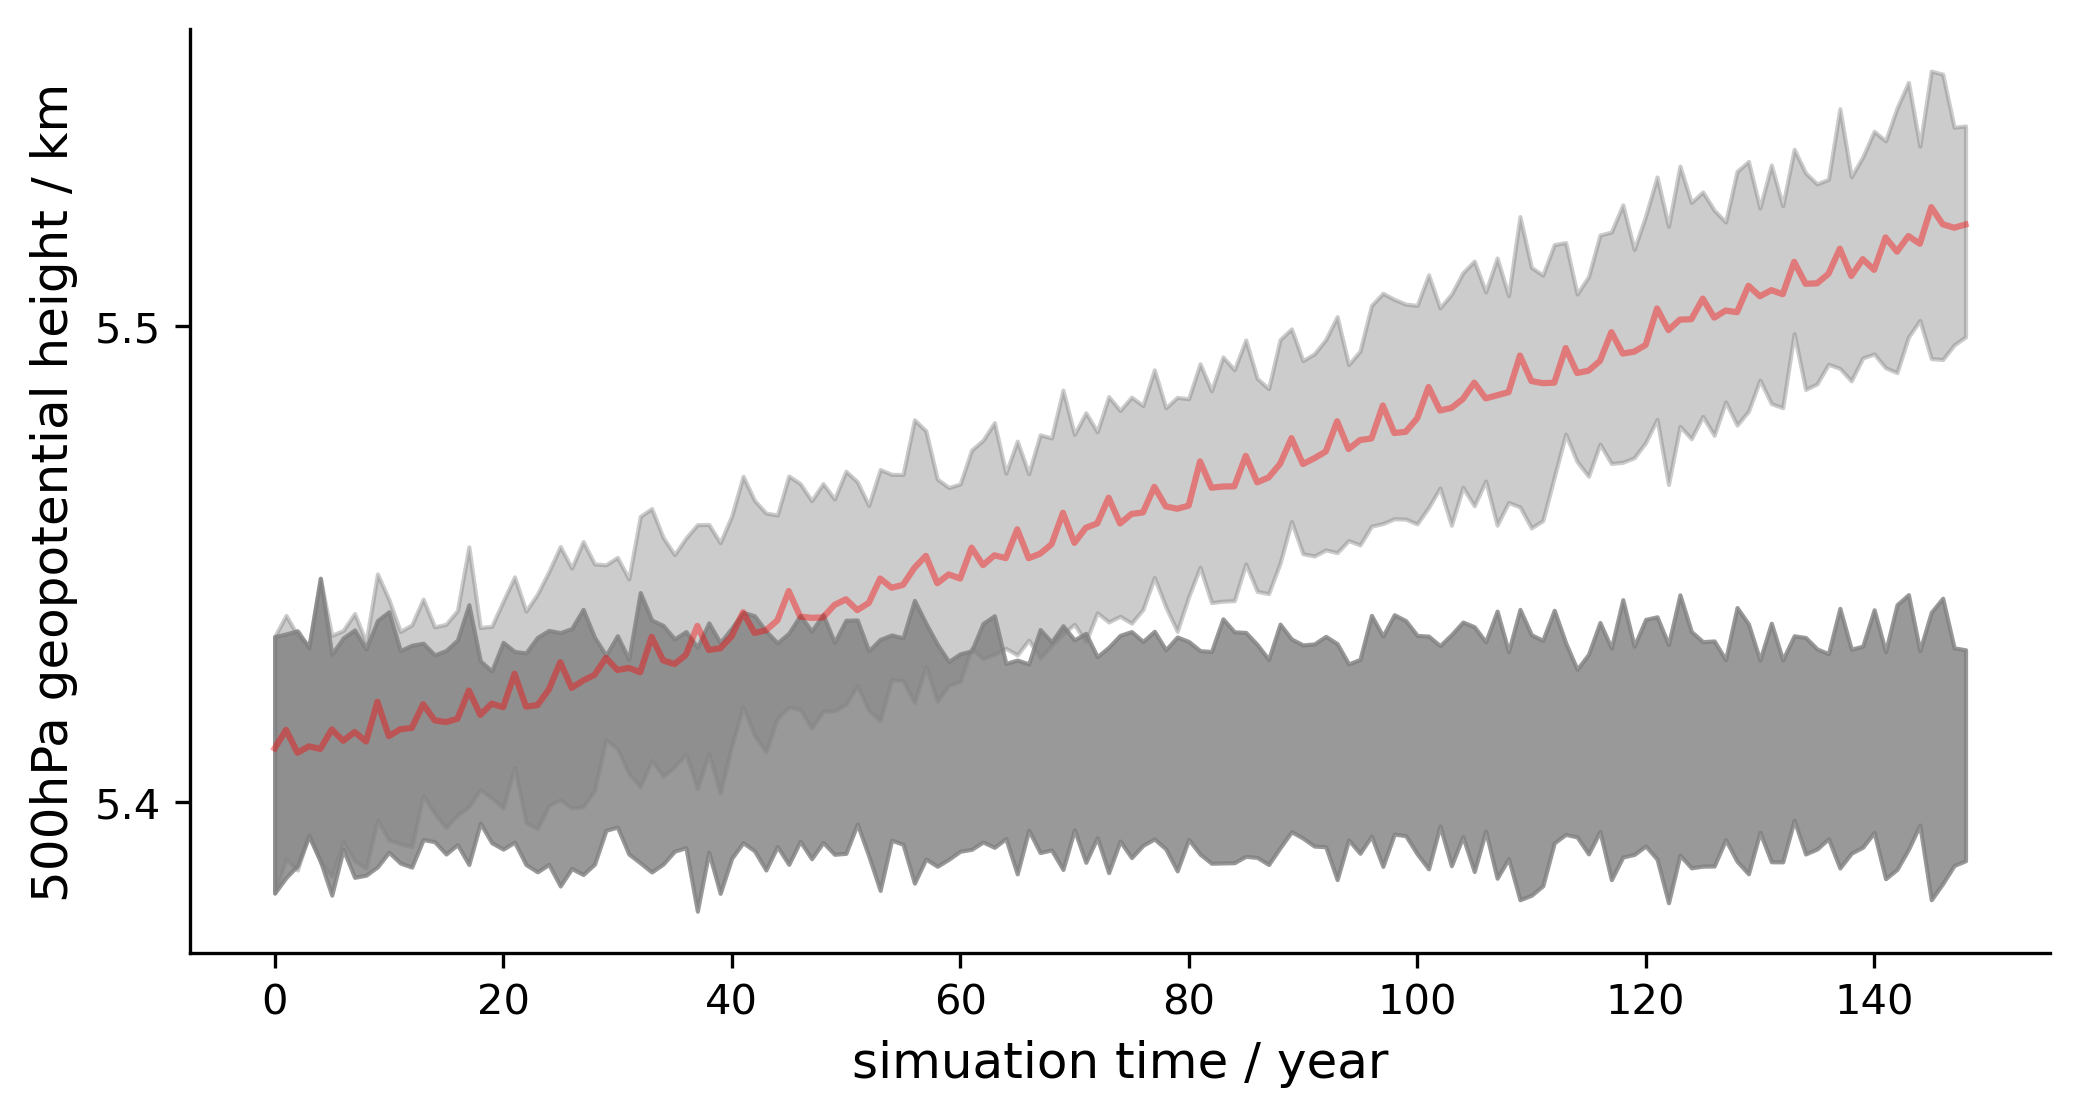

In [28]:
# fig with 300 dpi
plt.figure(figsize = (8,4),dpi = 300)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.plot(np.arange(0,149),spm_ensmean,color = 'red',alpha = 0.4)
plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0.4)
# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.fill_between(np.arange(0,149),spm_demeanmax.values,spm_demeanmin.values, color = 'gray', alpha = 0.8)

# no boundary line in upper and right
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ylalbel as "500hPa geopotential height (km)"
plt.ylabel("500hPa geopotential height / km", fontsize = 12)
# x label as "simuation time (year)"
plt.xlabel("simuation time / year", fontsize = 12)

# only show the yticks and labels on [5.4,5.5]
plt.yticks(np.arange(5.4,5.6,0.1),np.arange(5.4,5.6,0.1))




([<matplotlib.axis.YTick at 0x7f28aa819c30>,
 [Text(0, 5.4, '5.4'), Text(0, 5.5, '5.5')])

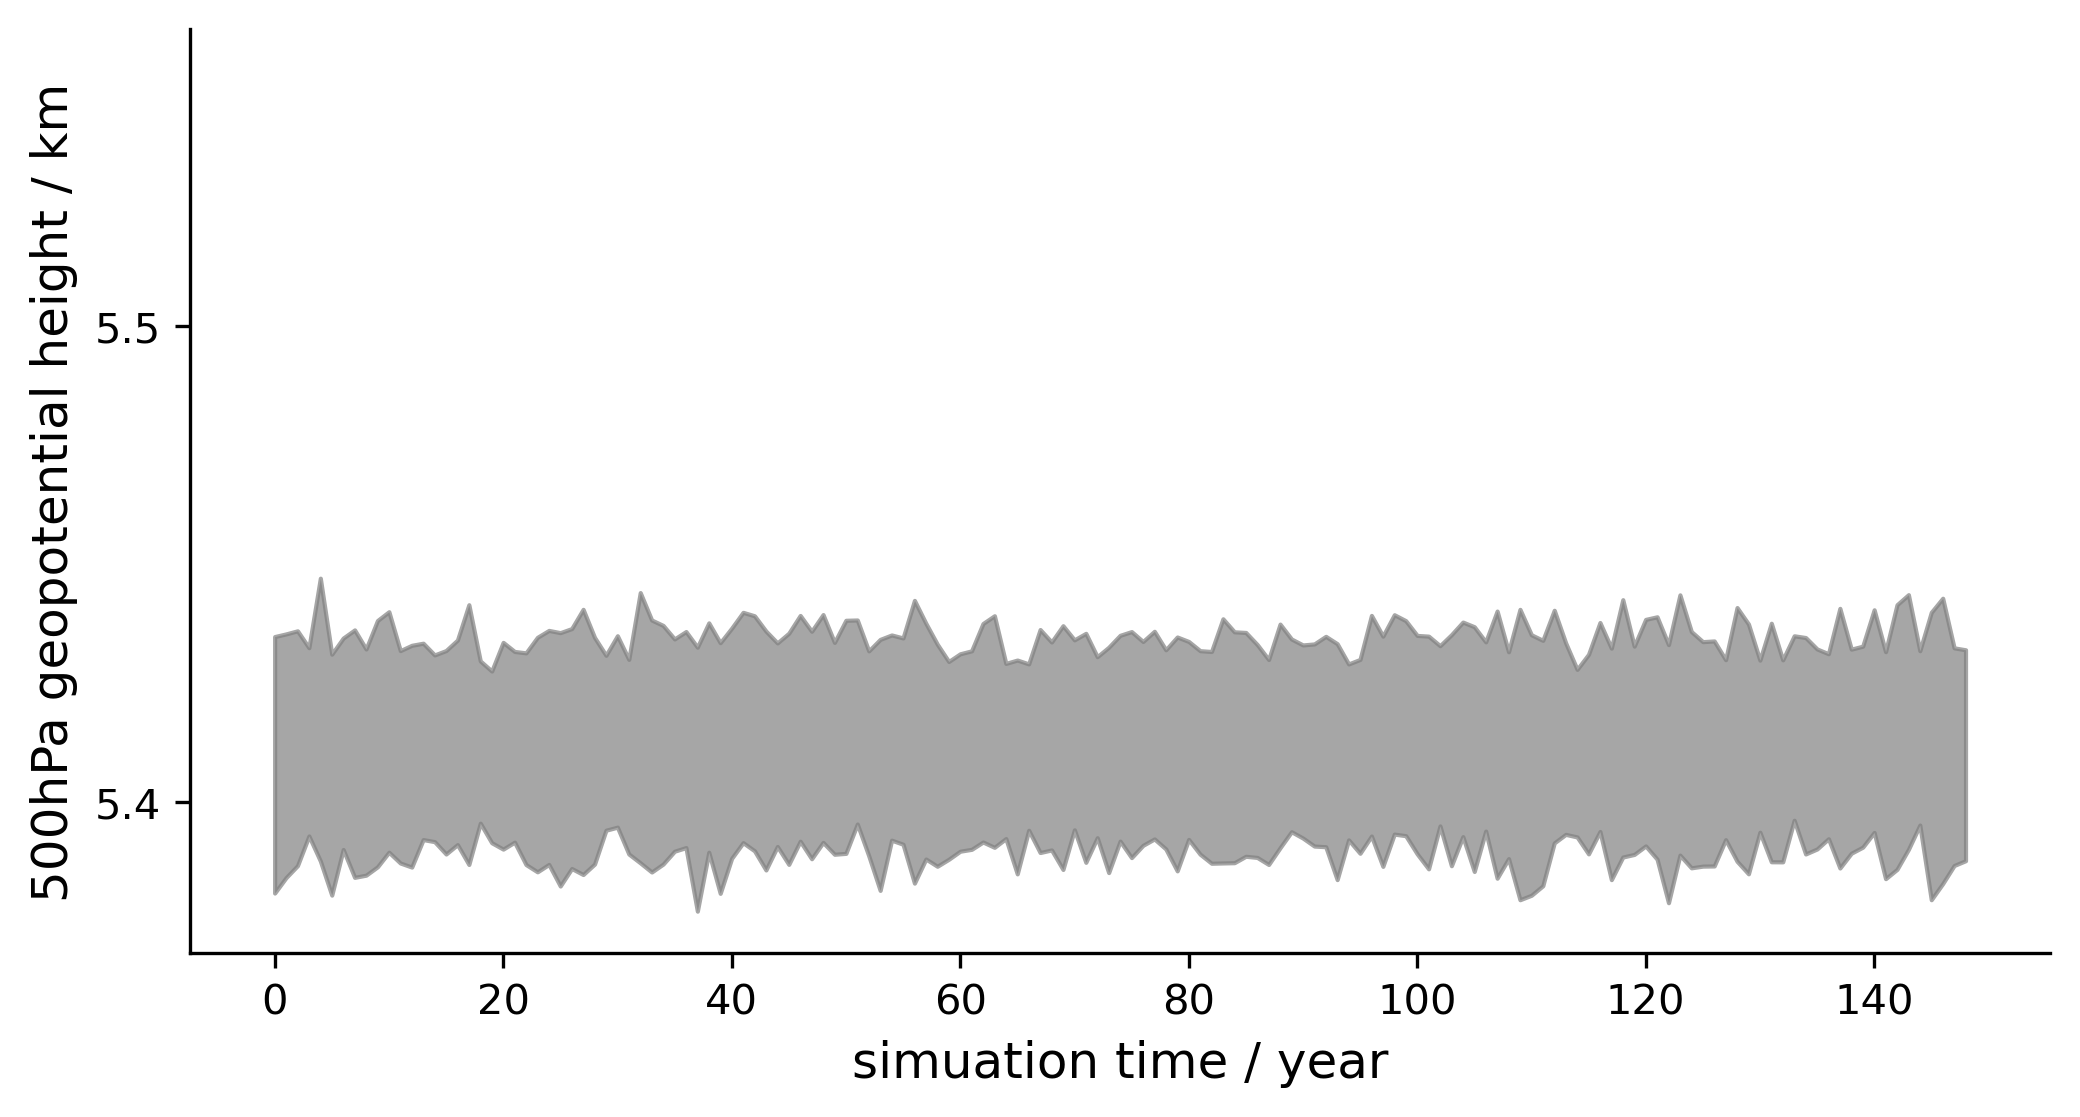

In [39]:
# fig with 300 dpi
plt.figure(figsize = (8,4),dpi = 300)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.plot(np.arange(0,149),spm_ensmean,color = 'red',alpha = 0)
plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0)
# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.fill_between(np.arange(0,149),spm_demeanmax.values,spm_demeanmin.values, color = 'gray', alpha = 0.7)

# no boundary line in upper and right
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ylalbel as "500hPa geopotential height (km)"
plt.ylabel("500hPa geopotential height / km", fontsize = 12)
# x label as "simuation time (year)"
plt.xlabel("simuation time / year", fontsize = 12)

# only show the yticks and labels on [5.4,5.5]
plt.yticks(np.arange(5.4,5.6,0.1),np.arange(5.4,5.6,0.1))


